In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]='0'

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
import tensorflow as tf

import sys
sys.path.append('/home/bis/2021_SJH_detectability/DbyDeep')
from model_DbyDeep_train import get_npy_DbyDeep

2023-03-20 01:50:24.574723: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-03-20 01:50:25.718131: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-03-20 01:50:25.719319: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-03-20 01:50:25.761472: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:af:00.0 name: NVIDIA RTX A6000 computeCapability: 8.6
coreClock: 1.8GHz coreCount: 84 deviceMemorySize: 47.54GiB deviceMemoryBandwidth: 715.34GiB/s
2023-03-20 01:50:25.761511: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-03-20 01:50:25.765096: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-0

In [2]:
# gpu setting
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024*4)])
    except RuntimeError as e:
        print(e)

In [3]:
print('Loading model...')
model = keras.models.load_model("/home/bis/2021_SJH_detectability/DbyDeep/log/model_DbyDeep_04_False.h5")
model.summary()

Loading model...


2023-03-20 01:50:28.106993: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 01:50:28.111780: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-03-20 01:50:28.113036: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:af:00.0 name: NVIDIA RTX A6000 computeCapability: 8.6
coreClock: 1.8GHz coreCount: 84 deviceMemorySize: 47.54GiB deviceMemoryBandwidth: 715.34GiB/s
2023-03-20 01:50:28.113103: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-03-20 01:50:28.113124: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Succ

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 15)]         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 15)]         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 15)]         0                                            
______________________________________________________________________________________________

In [4]:
df_massive=pd.read_csv('/data/2021_SJH_detectability/data_human/train.csv')
df_hpp=pd.read_csv('/data/2021_SJH_detectability/data_human/HPP.csv')
df_merge=pd.DataFrame(np.concatenate([df_massive.peptide.unique(), df_hpp.peptide.unique()]), columns=['peptide'])
df_merge['Drop']=True

# Cross Species - Mouse

Loading input peptides


2023-03-20 01:53:40.023441: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 400051520 exceeds 10% of free system memory.
2023-03-20 01:53:41.108178: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-03-20 01:53:41.125749: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3000000000 Hz
2023-03-20 01:53:51.062060: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-03-20 01:53:52.207389: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2023-03-20 01:53:52.328222: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-20 01:53:52.338308: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic librar

39068/39068 [==============================] - 1366s 35ms/step - loss: 0.7559 - accuracy: 0.6859
Test Loss: 0.7559202313423157
Test Accuracy: 0.6858884692192078
Test AUC : 0.9050804748477492
              precision    recall  f1-score   support

       False     0.9967    0.6745    0.8045   1198249
        True     0.1122    0.9491    0.2006     51912

    accuracy                         0.6859   1250161
   macro avg     0.5544    0.8118    0.5026   1250161
weighted avg     0.9600    0.6859    0.7795   1250161



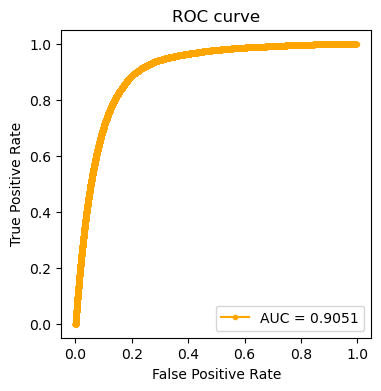

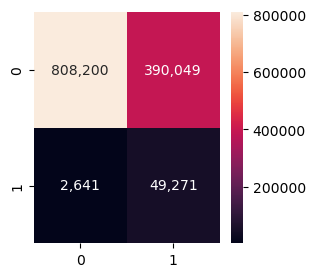

In [5]:
df_test = pd.read_csv('/data/2021_SJH_detectability/diff_tool/mouse_eph4/data.csv')
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)

df_test = df_test[df_test.peptide.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.nterm.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.cterm.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.miss1.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.miss2.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.peptide.apply(lambda x: 'Z' not in x)].reset_index(drop=True)

print('Loading input peptides')
pep_test, n_test, c_test, m1_test, m2_test, label_test = get_npy_DbyDeep(df_test)

probs = model.predict([pep_test, n_test, c_test, m1_test, m2_test])
y_pred = [1 if i>=0.5 else 0 for i in probs]
loss, acc = model.evaluate([pep_test, n_test, c_test, m1_test, m2_test], label_test)
auc = roc_auc_score(label_test, probs)

print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(label_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(label_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(label_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_mouse_KLife_DbyDeep_fpr.npy', fpr)
np.save('log/result_mouse_KLife_DbyDeep_tpr.npy', tpr)
np.save('log/result_mouse_KLife_DbyDeep_threshold.npy', threshold)
np.save('log/result_mouse_KLife_DbyDeep_probs.npy', probs)
np.save('log/result_mouse_KLife_DbyDeep_true.npy', label_test)

Loading input peptides


2023-03-20 02:40:33.878604: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 363074560 exceeds 10% of free system memory.
2023-03-20 02:57:18.250295: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 363074560 exceeds 10% of free system memory.


35457/35457 [==============================] - 1458s 41ms/step - loss: 0.7735 - accuracy: 0.6820
Test Loss: 0.7735130190849304
Test Accuracy: 0.6819536089897156
Test AUC : 0.8839402981941696
              precision    recall  f1-score   support

       False     0.9955    0.6715    0.8020   1088354
        True     0.1072    0.9279    0.1922     46254

    accuracy                         0.6820   1134608
   macro avg     0.5513    0.7997    0.4971   1134608
weighted avg     0.9592    0.6820    0.7771   1134608



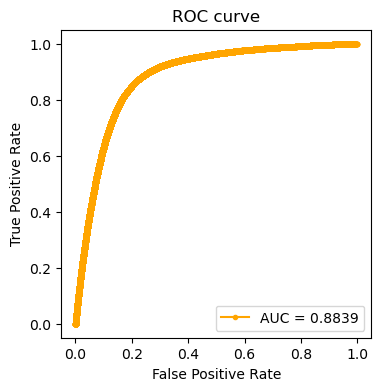

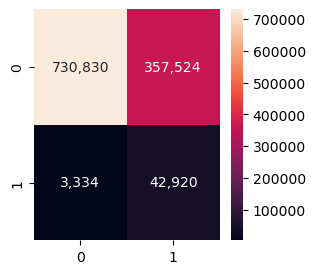

In [6]:
df_test = pd.read_csv('/data/2021_SJH_detectability/diff_tool/mouse_tmuscle/data.csv')
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)

df_test = df_test[df_test.peptide.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.nterm.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.cterm.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.miss1.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.miss2.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.peptide.apply(lambda x: 'Z' not in x)].reset_index(drop=True)

print('Loading input peptides')
pep_test, n_test, c_test, m1_test, m2_test, label_test = get_npy_DbyDeep(df_test)

probs = model.predict([pep_test, n_test, c_test, m1_test, m2_test])
y_pred = [1 if i>=0.5 else 0 for i in probs]
loss, acc = model.evaluate([pep_test, n_test, c_test, m1_test, m2_test], label_test)
auc = roc_auc_score(label_test, probs)

print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(label_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(label_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(label_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_mouse_SkeletaMuscle_DbyDeep_fpr.npy', fpr)
np.save('log/result_mouse_SkeletaMuscle_DbyDeep_tpr.npy', tpr)
np.save('log/result_mouse_SkeletaMuscle_DbyDeep_threshold.npy', threshold)
np.save('log/result_mouse_SkeletaMuscle_DbyDeep_probs.npy', probs)
np.save('log/result_mouse_SkeletaMuscle_DbyDeep_true.npy', label_test)

# Cross Species - Human

Loading input peptides


2023-03-20 03:22:25.700520: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 409939520 exceeds 10% of free system memory.


40034/40034 [==============================] - 1136s 28ms/step - loss: 0.6617 - accuracy: 0.7188
Test Loss: 0.661726176738739
Test Accuracy: 0.7187744975090027
Test AUC : 0.882274902612495
              precision    recall  f1-score   support

       False     0.9950    0.7122    0.8302   1236318
        True     0.1018    0.9009    0.1829     44743

    accuracy                         0.7188   1281061
   macro avg     0.5484    0.8066    0.5065   1281061
weighted avg     0.9638    0.7188    0.8076   1281061



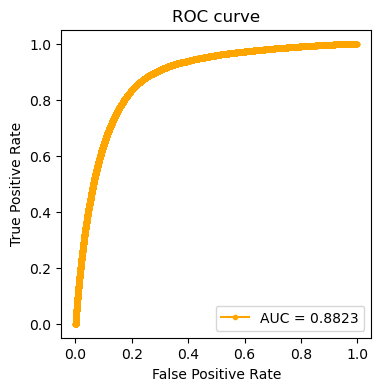

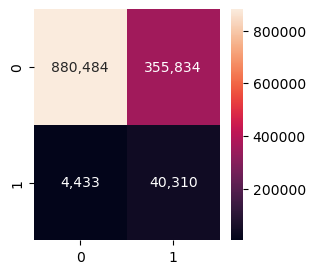

In [7]:
df_test = pd.read_csv('/data/2021_SJH_detectability/diff_tool/human_hek293/data.csv')
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)

print('Loading input peptides')
pep_test, n_test, c_test, m1_test, m2_test, label_test = get_npy_DbyDeep(df_test)

probs = model.predict([pep_test, n_test, c_test, m1_test, m2_test])
y_pred = [1 if i>=0.5 else 0 for i in probs]
loss, acc = model.evaluate([pep_test, n_test, c_test, m1_test, m2_test], label_test)
auc = roc_auc_score(label_test, probs)

print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(label_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(label_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(label_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_human_HEK293_DbyDeep_fpr.npy', fpr)
np.save('log/result_human_HEK293_DbyDeep_tpr.npy', tpr)
np.save('log/result_human_HEK293_DbyDeep_threshold.npy', threshold)
np.save('log/result_human_HEK293_DbyDeep_probs.npy', probs)
np.save('log/result_human_HEK293_DbyDeep_true.npy', label_test)

Loading input peptides
23431/23431 [==============================] - 649s 28ms/step - loss: 0.6593 - accuracy: 0.7206
Test Loss: 0.6593038439750671
Test Accuracy: 0.7206290364265442
Test AUC : 0.8678173617980524
              precision    recall  f1-score   support

       False     0.9957    0.7177    0.8341    733958
        True     0.0614    0.8563    0.1146     15830

    accuracy                         0.7206    749788
   macro avg     0.5286    0.7870    0.4744    749788
weighted avg     0.9760    0.7206    0.8190    749788



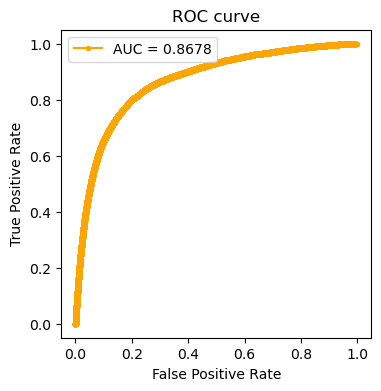

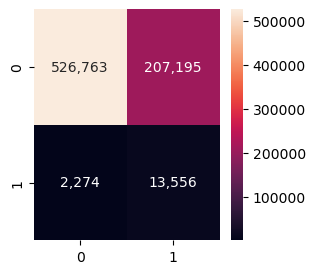

In [8]:
df_test = pd.read_csv('/data/2021_SJH_detectability/diff_tool/human_liver/data.csv')
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)

print('Loading input peptides')
pep_test, n_test, c_test, m1_test, m2_test, label_test = get_npy_DbyDeep(df_test)

probs = model.predict([pep_test, n_test, c_test, m1_test, m2_test])
y_pred = [1 if i>=0.5 else 0 for i in probs]
loss, acc = model.evaluate([pep_test, n_test, c_test, m1_test, m2_test], label_test)
auc = roc_auc_score(label_test, probs)

print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(label_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(label_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(label_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_human_HmapLiver_DbyDeep_fpr.npy', fpr)
np.save('log/result_human_HmapLiver_DbyDeep_tpr.npy', tpr)
np.save('log/result_human_HmapLiver_DbyDeep_threshold.npy', threshold)
np.save('log/result_human_HmapLiver_DbyDeep_probs.npy', probs)
np.save('log/result_human_HmapLiver_DbyDeep_true.npy', label_test)

# Cross Species - Yeast

Loading input peptides
20018/20018 [==============================] - 573s 29ms/step - loss: 0.6576 - accuracy: 0.7174
Test Loss: 0.6575855016708374
Test Accuracy: 0.7173909544944763
Test AUC : 0.906662475237099
              precision    recall  f1-score   support

       False     0.9866    0.6845    0.8082    557294
        True     0.3075    0.9378    0.4632     83280

    accuracy                         0.7174    640574
   macro avg     0.6471    0.8111    0.6357    640574
weighted avg     0.8983    0.7174    0.7634    640574



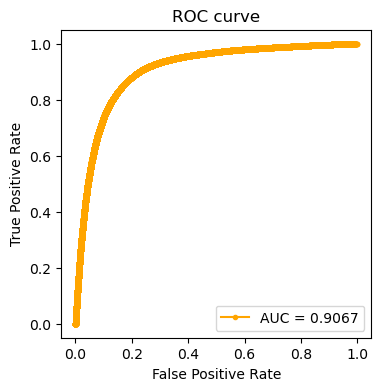

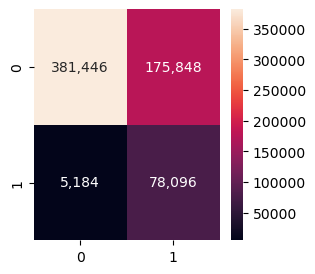

In [9]:
df_test = pd.read_csv('/data/2021_SJH_detectability/diff_tool/yeast_23/data.csv')
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)

df_test = df_test[df_test.peptide.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.nterm.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.cterm.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.miss1.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.miss2.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.peptide.apply(lambda x: 'Z' not in x)].reset_index(drop=True)

print('Loading input peptides')
pep_test, n_test, c_test, m1_test, m2_test, label_test = get_npy_DbyDeep(df_test)

probs = model.predict([pep_test, n_test, c_test, m1_test, m2_test])
y_pred = [1 if i>=0.5 else 0 for i in probs]
loss, acc = model.evaluate([pep_test, n_test, c_test, m1_test, m2_test], label_test)
auc = roc_auc_score(label_test, probs)

print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(label_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(label_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(label_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_yeast_DelPBP1_DbyDeep_fpr.npy', fpr)
np.save('log/result_yeast_DelPBP1_DbyDeep_tpr.npy', tpr)
np.save('log/result_yeast_DelPBP1_DbyDeep_threshold.npy', threshold)
np.save('log/result_yeast_DelPBP1_DbyDeep_probs.npy', probs)
np.save('log/result_yeast_DelPBP1_DbyDeep_true.npy', label_test)

Loading input peptides
18402/18402 [==============================] - 483s 26ms/step - loss: 0.8834 - accuracy: 0.6463
Test Loss: 0.8834120035171509
Test Accuracy: 0.6462631225585938
Test AUC : 0.8429089860420106
              precision    recall  f1-score   support

       False     0.9894    0.6314    0.7709    554951
        True     0.1284    0.8894    0.2244     33885

    accuracy                         0.6463    588836
   macro avg     0.5589    0.7604    0.4977    588836
weighted avg     0.9399    0.6463    0.7394    588836



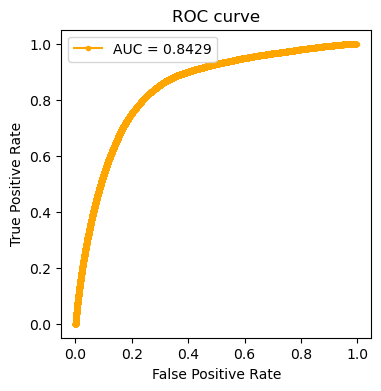

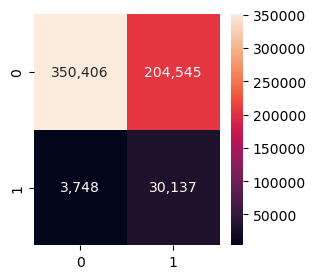

In [10]:
df_test = pd.read_csv('/data/2021_SJH_detectability/diff_tool/yeast_25/data.csv')
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)

df_test = df_test[df_test.peptide.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.nterm.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.cterm.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.miss1.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.miss2.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.peptide.apply(lambda x: 'Z' not in x)].reset_index(drop=True)

print('Loading input peptides')
pep_test, n_test, c_test, m1_test, m2_test, label_test = get_npy_DbyDeep(df_test)

probs = model.predict([pep_test, n_test, c_test, m1_test, m2_test])
y_pred = [1 if i>=0.5 else 0 for i in probs]
loss, acc = model.evaluate([pep_test, n_test, c_test, m1_test, m2_test], label_test)
auc = roc_auc_score(label_test, probs)

print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(label_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(label_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(label_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_yeast_KLife_DbyDeep_fpr.npy', fpr)
np.save('log/result_yeast_KLife_DbyDeep_tpr.npy', tpr)
np.save('log/result_yeast_KLife_DbyDeep_threshold.npy', threshold)
np.save('log/result_yeast_KLife_DbyDeep_probs.npy', probs)
np.save('log/result_yeast_KLife_DbyDeep_true.npy', label_test)